# SPRING 2021
# Applied Machine Learning, HW 8

<b><font color='red'>Instructions:</font></b>  Read all problems very carefully. Make sure that you are answering all questions included in a given problem. For every question, you are provided with a code cell to show your solution; be sure to run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

<img src='https://drive.google.com/uc?export=view&id=1v9dyG8EBMou_M_VlOj8-Rrqy9IG9686G' width='300'>

In this problem, you will explore a data set that contains information about the passengers of the famous ["Titanic" liner](https://en.wikipedia.org/wiki/Titanic) that sank in the North Athlantic Ocean on April 15, 1912 after striking an iceberg. To load the data set, run the code cell below (do not change the content of the cell!). This will load a slightly reduced version of the Titanic data into a Pandas data frame called `df`. 

In [ ]:
import pandas as pd
from seaborn import load_dataset

df=load_dataset('titanic')
cols=[0, 1, 2, 3, 6]
df=df.iloc[:, cols]
# 0 - male; 1 - female
df['sex']=(df['sex']=='female').astype(int).values

1. How many rows and columns are present in the data frame `df`?

In [ ]:

df.info

<bound method DataFrame.info of      survived  pclass  sex   age     fare
0           0       3    0  22.0   7.2500
1           1       1    1  38.0  71.2833
2           1       3    1  26.0   7.9250
3           1       1    1  35.0  53.1000
4           0       3    0  35.0   8.0500
..        ...     ...  ...   ...      ...
886         0       2    0  27.0  13.0000
887         1       1    1  19.0  30.0000
888         0       3    1   NaN  23.4500
889         1       1    0  26.0  30.0000
890         0       3    0  32.0   7.7500

[891 rows x 5 columns]>

2. Print to the screen the first 4 rows of `df`. 

In [ ]:
print(df[:4])

   survived  pclass  sex   age     fare
0         0       3    0  22.0   7.2500
1         1       1    1  38.0  71.2833
2         1       3    1  26.0   7.9250
3         1       1    1  35.0  53.1000


You should see that the data frame has the following columns:

* `survived`: the passenger's survival status (0 - drowned, 1 - survived);
* `pclass`: the passenger's ticket class (1 - 1st, 2 - 2nd, 3 - 3rd);
* `sex`: the passenger's gender (0 - male, 1 - female);
* `age`: the passenger's age in years;
* `fare`: the passenger's ticket fare.

3. Print to the screen a summary showing the number of missing values for each column.

In [ ]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
dtype: int64

4. Remove all rows with the missing values. Use a Pandas method called `dropna()`; the description of the method is available at the following [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). You can either overwrite `df` to save the result or set the `inplace` option of the `dropna()` method to `True` (this will overwrite the original data frame automatically).

In [ ]:
df.dropna(axis='index', inplace=True)

5. Print to the screen the new shape of the data frame `df`.

In [ ]:
df.shape

(714, 5)

6. Run the `info()` and `describe()` methods on the data frame. Do it in two separate code cells, so that the results are printed to the screen.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    int64  
 3   age       714 non-null    float64
 4   fare      714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [ ]:
df.describe()

,survived,pclass,sex,age,fare
count,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,34.694514
std,0.491460,0.838250,0.481921,14.526497,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,512.329200


7. Create a pair plot of the numerical features of `df`. Use the red color to label the passegers who did not survive the disaster and the green color to label those who survived (this information is available in the `survived` column of `df`: 0 - drowned, 1 - survived). Make the diagonal graphs of the pair plot display histograms rather than probability densities.

  Can you tell it just from the pair plot graphs what passengers had a greater chance of surviving the disaster?

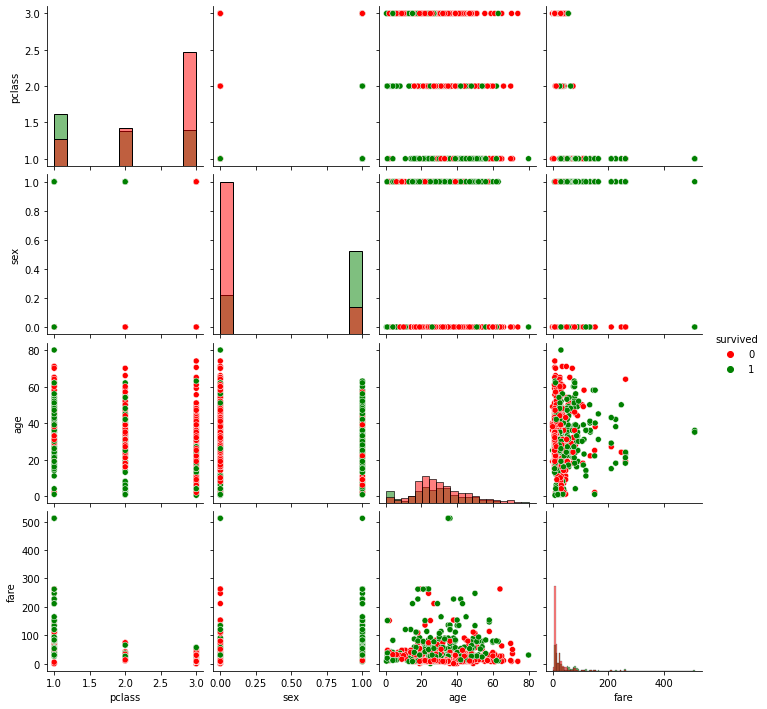

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, hue='survived', palette={0:'red', 1:'green'}, diag_kind='hist')
plt.show()
#It looks to me that most people who had a 1st class ticket, were female, younger than 70, and who paid the fare

8. Split the data into the training and testing sets: place 30% of the data into the testing set `X_train`, `y_train` and the rest into the training set `X_test`, `y_test`. Make sure that the proportion of the survived passengers (positive class) is the same in both training and testing sets by utilizing the `stratify` option. Use a random state of 42 when running the `train_test_split()` function.

In [ ]:
from sklearn.model_selection import train_test_split
cols = ['pclass','age','sex','fare']
x = df[cols].values
y = (df['survived']==1).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

9. Train a logistic regression classifier on the training data and print to the screen the bias term and the weights.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

bias_term = log_reg.intercept_[0]
weights = log_reg.coef_[0]

print(f"The weights are {weights[0]:.3f} and {weights[1]:.3f} and the bias term is {bias_term:.3f}.")

The weights are -1.251 and -0.037 and the bias term is 2.519.


10. Make predictions for the survival status on the test set data. Then compute the accuracy of these predictions and print it to the screen.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = log_reg.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model computed with the sklearn function is {acc:.5f}.")

The accuracy of the model computed with the sklearn function is 0.79070.


11. What about a 'dumb' classifier that predicts that all passengers drowned? Compute the accuracy of such a classifier and print it to the screen. Does our logistic regression model do a better job than the 'dumb' classifier in explaining the data?

In [ ]:
import numpy as np

y_pred_dumb = np.zeros(len(y_test))
acc_dumb = accuracy_score(y_test, y_pred_dumb)
print(f"The accuracy score predicted by the 'dumb' classifier is {acc_dumb:.3f}.")

The accuracy score predicted by the 'dumb' classifier is 0.595.


12. Compute the confusion matrix and print it to the screen in the form of an array and in the graphical form. Set `values_format = 'd'` when plotting the confusion matrix to supress the scientific notation format and rounding. What are the numbers of true positives (TP), true negatives (TN), false negatives (FN), and false positives (FP)? Note that the positive class here includes those passengers who survived the disaster.

[]

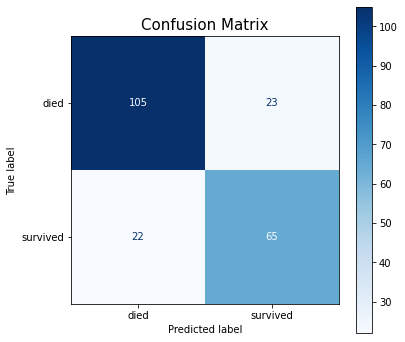

In [ ]:
from sklearn.metrics import plot_confusion_matrix
class_names=['died', 'survived']
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(log_reg, x_test, y_test,
                      display_labels = class_names,
                      values_format = 'd', 
                      cmap=plt.cm.Blues, ax=ax)

plt.title('Confusion Matrix', fontsize=15)

plt.plot()

**Answers:**

* TP = 105
* TN = 65
* FN = 22
* FP = 23

If you have liked working with this data set and want to explore it even further you might want to consider joining the following Kaggle competion: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic). In this competition, you get access to the full Titanic data, you can discuss your ideas with other participants, see how other people tackled this problem and learn from their work.

**Problem 2**

In this problem you will get familiar with another famous machine learning data set called MNIST. This data set is a collection of 70,000 grayscale images of handwritten digits with the corresponding labels showing what digit each image represents. In a sense, this data set is a "Hello, world!" of Machine Learning and it is very typical to use it for testing new image classification ideas. Here is a [link to the Wikipedia page](https://en.wikipedia.org/wiki/MNIST_database) containing more information about the data.

Run the code cell below to fetch the MNIST data. The data set is quite large, so it might take a minute or two to load it, so please be patient.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

1. The code above creates two NumPy arrays `X` and `y` containing the features and the target values. Check the shapes and data types of these arrays and demonstrate that they do not contain any missing values. 

In [ ]:
print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)


#Are there missing values???
X_mask = np.isnan(X)
y_mask = np.isnan(y)

print(np.count_nonzero(X_mask))
print(np.count_nonzero(y_mask))

(70000, 784)
(70000,)
float64
uint8
0
0


2. Wow! It looks like there are 784 features in `X`! This is correct: each MNIST image is 28x28 pixels, so the total number of pixels is exactly $28\times 28 = 784$ and each feature is simply the intensity value of one pixel of the image. The intensity values range from 0 (white) to 255 (black). 

  It is not very difficult to print any one of the MNIST images to the screen. For instance, let's plot the image whose NumPy index is equal to 5 (which makes it the sixth image in the data set -- remember NumPy indexing starts with zero!). To do that

  * load `matplotlib.pyplot` as `plt`;
  * select the row of `X` with index 5. Save it as `img`;
  * reshape the one-dimensional `img` array with 784 entries to a 28x28 two-dimensional array. Save the result by overwriting the `img` variable;
  * type the following command: `plt.imshow(img, cmap='binary')`; this is going to print the `img` array to the screen as an image (the full description of `plt.image()` is available at the [following link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)); 
  * type `plt.show()` and run the code cell.

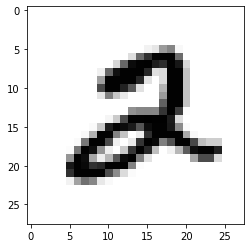

In [ ]:
import matplotlib.pyplot as plt
img = X[5]
img  = img.reshape((28,28))
plt.imshow(img,cmap='binary')
plt.show()

3. If you have done it correctly, you should now see an image of a digit that looks like a 2. Print to the screen the label of this image from the `y` array.

In [ ]:
print(y[5])

2


4. The label is 2, so it makes sense. Our goal here is to build a binary classifier that can identify only one digit, say 2. The Wikipedia page cited above contains more examples of MNIST images, so you might want to check them out to get a feel of how easy or difficult this classification task appears to be.

  Currenlty the target `y` contains 10 classes (digits from 0 to 9). Convert it to a binary target that has ones for all digit 2 entries and zeros for all other entries (you might want to review our lectures note to see how we performed a similar conversion on the Iris flower data set target). Save the new target as `y`. Then split the data set into the training (70%) and testing set (30%) stratifying on the new target `y`. Use a random state of 42 when running the `train_test_split()` function.

In [ ]:
from sklearn.model_selection import train_test_split
y = np.where(y == 2, 1, y)
y = np.where(y != 1,0, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

5. Demonstrate that the percentage of the positive class instances (digit 2) is the same in both training and testing sets.

In [ ]:
print(f"The percentage of positive class instances in 'y_train' is {(y_train==1).mean():.5f}.")
print(f"The percentage of positive class instances in 'y_test' is {(y_test==1).mean():.5f}.")

The percentage of positive class instances in 'y_train' is 0.21239.
The percentage of positive class instances in 'y_test' is 0.21238.


6. Build a simple pipeline including a standard scaler and a logistic regression estimator. Set the `max_iter` parameter of the logistic regression estimator to 400 -- otherwise it won't converge. The scaler is needed to speed up the convergence. After that train the pipeline on the training data (be patient -- this is a moderate size data set, so this step might take a minute or two) and compute the accuracy of the test set predictions.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
                 ('sc', StandardScaler()),
                 ('lr', LogisticRegression())
])
pipe.fit(X_train,y_train)
y_preds = pipe.predict(X_test)
acc = (y_test == y_preds).mean()
print(f"The accuracy of the model is {acc:.5f}.")

7. Compute the precision and recall parameters on the test set data. Save the results as `prc_50` and `rcl_50`, respectively, print them to the screen keeping only 5 decimals.

8. Now compute the accuracy of a 'dumb' classifier predicting class 0 for all instances of test. The result might look very surprising!

9. Predict the probabilities of positive class for the test set instances. Save the result as `y_probas`. Use this result to obtain the arrays of the precision and recall values for different decision thresholds using a standard function from the scikit-learn library. Then plot both the precision and recall versus the decision threshold on the same set of axes. Label the precision and recall curves as 'precision' and 'recall', respectively, and create a plot legend. Use the blue and green colors for the precision and recall curves, respectively, label the horizontal axis as 'Threshold' and create a title saying 'Precision/Recal vs. Threshold'.

  Show on your graph a vertical dotted red line marking the threshold value of 0.5 (see how we did it in class).

10. Plot a *precision-recall curve*. Label the axes and create a matching title for the plot.

11. Compute the area under the precision-recall curve and print it to the screen.

If you have liked playing with the MNIST data set you can explore it further on Kaggle: [Digit Recognizer](https://www.kaggle.com/c/digit-recognizer). Have fun!